### Шмидт Ян, 304 гр., 2023, Вариант 9
$$f(x) = 3 \cos\left(\dfrac{3x}{2}\right) e\left(\dfrac{x}{4}\right) + 4 \sin\left(\dfrac{7x}{2}\right) e(−3x) + 4x$$

$$a=2.5, b=3.3, \alpha=\dfrac{2}{3}, \beta=0$$
# Часть 1. Квадратурные формулы (КФ) Ньютона-Котеса и Гаусса

## Часть 1.1. Посчитать интеграл с использованием составных квадратурных формул (СКФ): 
<i> 1) средних и 2) левых прямоугольников, 3) трапеции, 4) Симпсона </i>
### Подынтегральная функция — $f(x)$ из своего варианта ($p(x) \equiv 1$):
Посчитать $$\int_{a}^{b} f(x) dx = \int_{2.5}^{3.3} \left[3 \cos\left(\dfrac{3x}{2}\right) e\left(\dfrac{x}{4}\right) + 4 \sin\left(\dfrac{7x}{2}\right) e(−3x) + 4x\right] dx$$

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

### Функции из задания

In [3]:
def f(x):
    return 3*np.cos(3*x/2)*np.exp(x/4) + 4*np.sin(7*x/2)*np.exp(-3*x) + 4*x

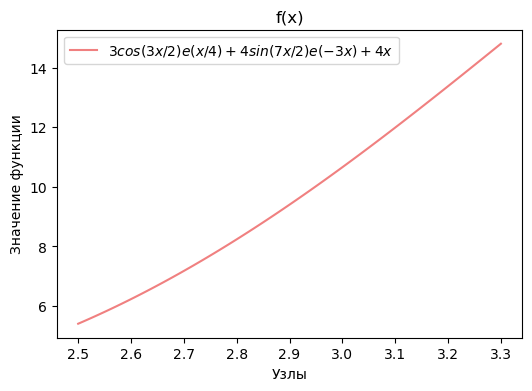

In [4]:
plt.rcParams["figure.figsize"] = (6, 4)

a, b, n = 2.5, 3.3, 100
nodes = np.linspace(a, b, n)
f_val = []

for i in range(len(nodes)):
    f_val.append(f(nodes[i]))
    
plt.plot(nodes, f_val, 
         label='$3cos(3x/2)e(x/4) + 4sin(7x/2)e(-3x) + 4x$',
         color='lightcoral', alpha=1)

plt.xlabel('Узлы')
plt.ylabel('Значение функции')
plt.title('f(x)')
plt.legend(loc='best')

In [5]:
def F(x):
    return (3*np.cos(3*x/2)*np.exp(x/4) + 4*np.sin(7*x/2)*np.exp(-3*x) + 4*x) / (x-2.5)**(2/3)

/var/folders/8b/6ssktshx6r1fmq77tl5ypb7c0000gn/T/ipykernel_40203/3929523617.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  return (3*np.cos(3*x/2)*np.exp(x/4) + 4*np.sin(7*x/2)*np.exp(-3*x) + 4*x) / (x-2.5)**(2/3)


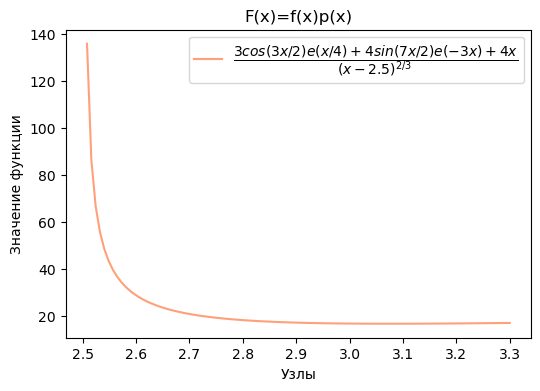

In [6]:
F_nodes = np.linspace(a, b, n)
F_val = []

for i in range(len(F_nodes)):
    F_val.append(F(F_nodes[i]))
    

plt.plot(F_nodes, F_val, 
         label='$\dfrac{3cos(3x/2)e(x/4) + 4sin(7x/2)e(-3x) + 4x}{(x-2.5)^{2/3}}$',
         color='lightsalmon', alpha=1)

plt.xlabel('Узлы')
plt.ylabel('Значение функции')
plt.title('F(x)=f(x)p(x)')
plt.legend(loc='best')

### Метод средних прямоугольников
Разбиваем $[a,b]$ на $n$ частей и считаем значение функции в середине каждого частичного отрезка

In [7]:
def mid_sq(num_nodes):
    """computes an approximation of the integral of f from a to b using
    the composite middle squares with n intervals"""
    a, b, n = 2.5, 3.3, num_nodes
    nodes = np.linspace(a, b, n)
    h = (b-a)/n
    int_result = 0

    for i in range(1, len(nodes)):
        int_result += f(a + (i-0.5)*h)
        
    return h*int_result

### Метод левых прямоугольников
Здесь идея та же, что и в методе средних прямоугольников — единственное отличие заключается в том, что значение функции считаем в левой точке частичного отрезка, а не в серединной

In [8]:
def left_sq(num_nodes):
    """computes an approximation of the integral of f from a to b using
    the composite left squares with n intervals"""
    a, b, n = 2.5, 3.3, num_nodes
    nodes = np.linspace(a, b, n)
    h = (b-a)/n
    int_result = 0
    
    for i in range(1, len(nodes)):
        int_result += f(a + (i-1)*h)
        
    return h*int_result

### Метод трапеции

In [9]:
def trapez(num_nodes):
    """computes an approximation of the integral of f from a to b using
    the composite trapezoidal tule with n intervals"""
    a, b, n = 2.5, 3.3, num_nodes
    nodes = np.linspace(a, b, n)
    h = (b-a)/n
    int_result = 0
    
    for i in range(1, len(nodes)):
        int_result += (f(a + h*(i-1)) + f(a + h*(i)))
    
    return 0.5*h*int_result

### Формула Симпсона

In [10]:
def simp(num_nodes):
    """computes an approximation of the integral of f from a to b using
    the composite Simpson rule with n intervals"""
    a, b, n = 2.5, 3.3, num_nodes
    nodes = np.linspace(a, b, n)
    h = (b-a)/n
    int_result = 0
    
    for i in range(1, len(nodes)):
        int_result += (f(a+h*(i-1)) + 4*f(a + (i-0.5)*h) + f(a+h*(i)))
    return (1/6)*h*int_result

In [11]:
print(mid_sq(1000), left_sq(1000), trapez(1000), simp(1000))

7.701722598370211 7.697964218123029 7.701723137350971 7.7017227780304625


## Часть 1.2. Посчитать интеграл с использованием СКФ на базе 3-x-точечных формул 
<i> 1) Ньютона-Котеса, 2) Гаусса </i> — это интерполяционные квадратурные формулы (ИКФ)
### Подынтегральная функция $F(x) = p(x)\cdot f(x)$ из своего варианта ($p(x) \not\equiv 1$):

Посчитать $$\int_{a}^{b} F(x) dx = \int_{a}^{b} p(x)\cdot f(x) dx  = \int_{2.5}^{3.3} \dfrac{f(x)}{(x-a)^{\alpha}(b-x)^{\beta}}  dx = \bigg\{ \beta = 0 \bigg\} = \int_{2.5}^{3.3} \dfrac{f(x)}{\left(x-2.5\right)^{2/3}} dx = \int_{2.5}^{3.3} \dfrac{3 \cos\left(\dfrac{3x}{2}\right) e\left(\dfrac{x}{4}\right) + 4 \sin\left(\dfrac{7x}{2}\right) e(−3x) + 4x}{\left(x-2.5\right)^{2/3}} dx $$

$$p(x)=\dfrac{1}{\left(x-2.5\right)^{2/3}} = \left(x-2.5\right)^{-2/3}$$
<u>Примечание</u>: узлы каждой малой 3-х-точечной КФ Гаусса находить с помощью <u>формул Кардано</u>.

![image](./images/АСТ1.png)
![image](./images/alg.png)

### Вычисление моментов
Для начала руками посчитаем моменты $0, 1$ и $2$ порядков (потому что мы пользуемся <b>трехточечными формулами</b> — на каждом частичном интервале берется $3$ точки, $i=\overline{0,n-1}=\overline{0,3-1}=\overline{0,2}$)
$$\mu_i = \int_{x_j}^{x_{j+1}} p(x)x^i dx = \int_{x_j}^{x_{j+1}} \dfrac{x^i}{\left(x-2.5\right)^{2/3}} dx, \;\; i=\overline{0,2}$$


In [12]:
def momentum(i, a, b):
    """Вычисление трех моментов порядков i=0, 1, 2 на 
    частичном промежутке [a, b]"""
    res0, res1, res2 = 0, 0, 0
    
    res0 = ((b - 2.5)**(1-(2/3)) - (a - 2.5)**(1-(2/3))) / (1-(2/3))
    res1 = (((b - 2.5)**(2-(2/3)) - (a - 2.5)**(2-(2/3))) / (2-(2/3))) + 2.5*res0
    res2 = (((b - 2.5)**(3-(2/3)) - (a - 2.5)**(3-(2/3))) / (3-(2/3))) + 2*2.5*res1 - (2.5**2)*res0
    
    if i == 0:
        return res0
    elif i == 1:
        return res1
    elif i == 2:
        return res2

### СКФ Ньютона-Котеса (ИКФ с равноотстоящими узлами)

In [13]:
def newt_cot(num_nodes, i=None, runghe=None, H=None):
    a, b, = 2.5, 3.3
#     Считаем num_nodes равноотстоящих узлов, если не указывается иное
    if i != None:
        n = num_nodes*2**i
    else:
        n = num_nodes
    
    nodes = np.linspace(a, b, n)
    if H == None:
        s, h = 0, (b-a)/n
    else:
        s, h = 0, H

    for i in range(1, len(nodes)):
        c = np.array([
            [1, 1, 1],
            [a+(i-1)*h, a+(i-0.5)*h, a+i*h],
            [(a+(i-1)*h)**2, (a+(i-0.5)*h)**2, (a+i*h)**2]
        ])
        mu_vec = np.array([
            [momentum(0, a+(i-1)*h, a+(i)*h)],
            [momentum(1, a+(i-1)*h, a+(i)*h)],
            [momentum(2, a+(i-1)*h, a+(i)*h)]
        ])
        A = np.linalg.solve(c, mu_vec)
        s += float(A[0]*f(a+(i-1)*h) + A[1]*f(a+(i-0.5)*h) + A[2]*f(a+i*h))
        
    if runghe != None:
        return s, n
    else:
        return s

In [14]:
print(newt_cot(10, i=4, runghe=1)[0],
      newt_cot(10, i=4, runghe=1)[1])

20.64436645487193 160


### СКФ Гаусса (КФНАСТ — ИКФ с узлами, которые обеспечивают НАСТ)

![image](./images/КФНАСТ1.png)
![image](./images/КФНАСТ-alg.png)

### Формула Кардано

In [15]:
def kardano(a, b, c, d):
    """y = x + b/3a"""
   
    q = 0.5*(((2*b**3)/(27*a**3)) - (b*c/3*a**2) + d/a)
    p = ((3*a*c - b**2)/(3*a**2)) / 3
    if (p >= 0) or (q**2+p**3 > 0):
        return 'комплексные корни..'
    if q < 0:
        r = (-1)*np.sqrt(np.abs(p))
    else:
        r = np.sqrt(np.abs(p))

    pi = 3.14159265
    
    # np.cos(phi) = q/r**3
    phi = np.arccos(q/r**3)

    y1 = -2*r*np.cos(phi/3)
    y2 = 2*r*np.cos(pi/3 - phi/3)
    y3 = 2*r*np.cos(pi/3 + phi/3)

    x=[]
    res = [y1,y2,y3]

    for _ in res:
        x.append(_ - b/3*a)
    return x

### Сделаем замену переменных

Вычислим интеграл в новых переменных:
$$\int_{2.5}^{3.3} \dfrac{f(x)}{(x-2.5)^{2/3}} dx = \bigg\{ x-2.5=t \bigg\} = \int_0^{0.8} \dfrac{\overline{f}(t)}{t^{2/3}} dt \approx \sum_{i=1}^n A_i \overline{f}(t_i)$$
Моменты будут вычисляться так:
$$\mu_i = \int_{x_j}^{x_{j+1}} p(t)t^i dt = \int_{x_j}^{x_{j+1}} t^{i-{2/3}} dt = \dfrac{x_{j+1}^{i-2/3+1}-x_{j}^{i-2/3+1}}{i-2/3+1}$$

In [16]:
def f_new(t):
    a = 2.5
    """f-штрих от t"""
    return 3*np.cos(3*(t+a)/2)*np.exp((t+a)/4) + 4*np.sin(7*(t+a)/2)*np.exp(-3*(t+a)) + 4*(t+a)

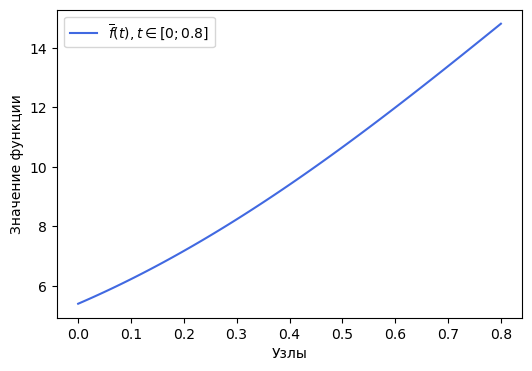

In [17]:
a, b, n = 0, 0.8, 100
nodes = np.linspace(0, b, n)
f_new_val = []

for i in range(len(nodes)):
    f_new_val.append(f_new(nodes[i]))
    
plt.plot(nodes, f_new_val, 
         label='$\overline{f}(t), t\in[0; 0.8]$',
         color='royalblue', alpha=1)

plt.xlabel('Узлы')
plt.ylabel('Значение функции')
plt.legend(loc='best')

In [1]:
def mnt_new(i, a, b):
    """Вычисление моментов порядка i на каждом
    частичном промежутке [a, b] в новых переменных"""
    return (-(b)**(i-2/3+1) + (a)**(i-2/3+1)) / (i-2/3+1)

In [18]:
def gauss(num_nodes):
    a, b, n = 0, 0.8, num_nodes
    nodes = np.linspace(a, b, n)
    h = (b-a)/n
    s = 0
    
    for i in range(1, len(nodes)):
#         1) посчитать моменты
        mu0 = mnt_new(0, a+(i-1)*h, a+i*h)
        mu1 = mnt_new(1, a+(i-1)*h, a+i*h)
        mu2 = mnt_new(2, a+(i-1)*h, a+i*h)        
        mu3 = mnt_new(3, a+(i-1)*h, a+i*h)
        mu4 = mnt_new(4, a+(i-1)*h, a+i*h)
        mu5 = mnt_new(5, a+(i-1)*h, a+i*h)
        
        
#         2) вычислить a_j через СЛАУ
        matr = np.array([
            [mu0, mu1, mu2],
            [mu1, mu2, mu3],
            [mu2, mu3, mu4]
        ])  
        great_moments = np.array([
            [-mu3],
            [-mu4],
            [-mu5]
        ])
        Aj = np.linalg.solve(matr, great_moments)
        
        
#         3) найти узлы x_j как корни кубического ур-я с коэффициентами a_j из 2) — по формулам Кардано
        Xj = kardano(1, float(Aj[2]), float(Aj[1]), float(Aj[0]))

        
#         4) найти A_j
        c = np.array([
            [1, 1, 1],
            [Xj[0], Xj[1], Xj[2]],
            [(Xj[0])**2, (Xj[1])**2, float(Xj[2])**2],
        ])
        mu_vec = np.array([
            [-mu0],
            [-mu1],
            [-mu2]
        ])
        A = np.linalg.solve(c, mu_vec)        
        s += float((A[0]*f_new(a+(i-1)*h) + A[1]*f_new(a+(i-0.5)*h) + A[2]*f_new(a+i*h)))
    return s

## Часть 1.3. Для каждой квадратурной формулы из частей 1.1 — 1.2 нарисовать график зависимости абсолютной погрешности от количества разбиений интервала интегрирования

### График для части 1.1

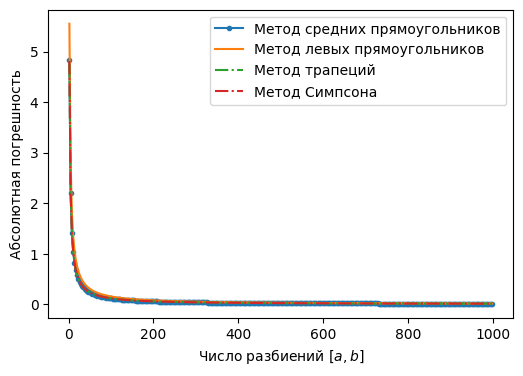

In [137]:
v1,v2,v3,v4=[],[],[],[]
ii=[]

for i in range(2, 1000, 3):
    ii.append(i)
    v1.append(7.71356710-mid_sq(i))
    v2.append(7.71356710-left_sq(i))
    v3.append(7.71356710-trapez(i))
    v4.append(7.71356710-simp(i))

fig = plt.figure()
fig.size = (1,5)
plt.plot(ii, v1, '.-', label='Метод средних прямоугольников')
plt.plot(ii, v2, '-', label='Метод левых прямоугольников')
plt.plot(ii, v3, '-.', label='Метод трапеций')
plt.plot(ii, v4, '-.', label='Метод Симпсона')
plt.xlabel('Число разбиений $[a, b]$')
plt.ylabel('Абсолютная погрешность')
plt.legend(loc='best')
plt.show()

### График для части 1.2

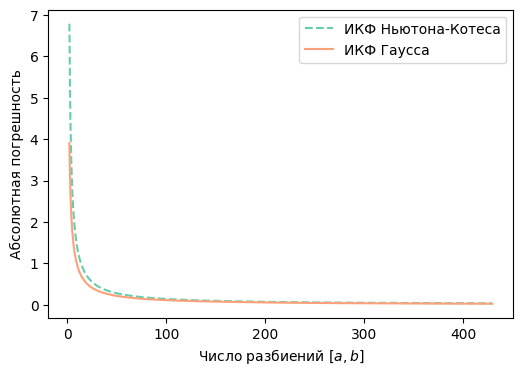

In [138]:
v1,v2=[],[]
ii=[]
# integrate (3*cos(3*x/2)*exp(x/4) + 4*sin(7*x/2)*exp(-3*x) + 4*x)/(x-2.5)^(2/3) dx from 2.5 to 3.3
for i in range(2, 430):
    ii.append(i)
    v1.append(20.730271-newt_cot(i))
    v2.append(20.730271-gauss(i))

fig = plt.figure()

plt.plot(ii, v1, '--', label='ИКФ Ньютона-Котеса', color='mediumaquamarine')
plt.plot(ii, v2, '-', label='ИКФ Гаусса', color='lightsalmon')

plt.xlabel('Число разбиений $[a, b]$')
plt.ylabel('Абсолютная погрешность')
plt.legend(loc='best')
plt.show()

# Часть 2. Методы оценки погрешности составных квадратурных формул

## Часть 2.1. Посчитать интеграл с заданной точностью $\varepsilon = 10^{-6}$ c использованием 3-х-точечной СКФ Ньютона-Котеса. Погрешность оценивать методом Ричардсона. На каждых последовательных трех точках оценивать скорость сходимости по правилу Эйткена. Указать длину шага $h$ разбиения интервала интегрирования, при котором была достигнута требуемая точность $\varepsilon$.

### Правило Рунге
Ошибка квадратурной формулы представляется в виде ряда по степеням шага интегрирования h. Асимптотически разложим погрешность СКФ по шагу равномерного разбиения интервала интегрирования $h$: $$R_h=C_m h^m + O(h^{m+1})$$ Рассмотрим $L=2$ — во столько раз мельче шаг второй сетки (в общем случае L > 1).

<b>Правило Рунге</b> заключается в том, чтобы произвести расчет на двух сетках с шагом $h_1, \;\; h_2=2^{-1}h_1:$ $$R_{h_1}=J(f)-S_{h_1}=C_m h_1^m\\R_{h_2}=J(f)-S_{h_2}=C_m h_2^m$$

$S_{h_2}-S_{h_1}=C_m h^m\left(1-\dfrac{1}{2^m}\right)+O(h^{m+1}) \Rightarrow C_m = \dfrac{S_{h_2}-S_{h_1}}{h^m(1-2^{-m})} + O(h^{m+1})$

Найдем приближенные представления погрешностей $R_{h_1}, R_{h_2}$ СКФ на рассматриваемых равномерных сетках $h_1, h_2$: $$R_{h_1}=J(f)-S_{h_1} \approx \dfrac{S_{h_2}-S_{h_1}}{1-2^{-m}} \\ R_{h_2}=J(f)-S_{h_2} \approx \dfrac{S_{h_2}-S_{h_1}}{2^{m}-1}$$

while погрешность $R_{h_i}$ при шаге разбиения $h_i:$ $R_{h_i}> \varepsilon \Rightarrow$ продолжаем считать с уменьшающимся вдвое шагом: $h_i, \;\; h_{i+1}=2^{-1} h_i$

Используя правило Рунге, можно решить вопрос о нахождении <u>оптимального шага разбиения</u> $h_{opt}$ интервала интегрирования, обеспечивающего (в первом приближении) вычисление интеграла с требуемой точностью $\varepsilon$:
$$\varepsilon = |R_{h_{opt}}|\approx |C_m H_{opt}^m| \approx \dfrac{|S_{h_2}-S_{h_1}|}{h^m(1-2^{-m})}h^m_{opt} = R_{h_1}\left( \dfrac{h_{opt}}{h} \right)^m \Rightarrow \\ h_{opt}=h\left(\dfrac{\varepsilon(1-2^{-m})}{|S_{h_2}-S_{h_1}|}\right)^\frac{1}{m}=h_1 \sqrt[m]{\dfrac{\varepsilon}{|R_{h_1}|}}=h_2 \sqrt[m]{\dfrac{\varepsilon}{|R_{h_2}|}}$$

### Правило Эйткена (оценка скорости сходимости)
Пусть $h_1 = h, \;\; h_2 = 2^{-1} h_1, \;\; h_3 = 2^{-1} h_2 = 2^{-2} h_1$. Порядок главного члена погрешности $m$ можно оценить по формуле $$m \approx - \dfrac{\ln \dfrac{S_{h_3}-S_{h_2}}{S_{h_2}-S_{h_1}}}{\ln 2}$$

In [19]:
def Runghe(n_nodes, acc=10e-4, show=False):
    eps = acc
    Rh1, Rh2 = 10000, 10000
    Cm, j = 0, 0
    h = 0.8 / n_nodes

    while Rh2 > eps:
        j += 1
    #     результат на первой сетке с шагом h_j
        Sh1 = newt_cot(n_nodes, i=j, runghe=1)
    #     результат на второй сетке с шагом h_{j+1}
        Sh2 = newt_cot(n_nodes, i=j+1, runghe=1)
    #     результат на третье сетке с шагом h_{j+2}
        Sh3 = newt_cot(n_nodes, i=j+2, runghe=1)

        Rh1 = (Sh2[0]-Sh1[0]) / (1-2**(-j))
#         print(Rh1 + Sh1[0])
        Rh2 = (Sh2[0]-Sh1[0]) / (2**(j)-1)
#         print(Rh2 + Sh2[0])
        
        Cm = (Sh2[0]-Sh1[0]) / (1/Sh1[1]*(1-2**(-j)))

        m = -np.log2((Sh3[0]-Sh2[0]) / (Sh2[0]-Sh1[0])) / np.log2(2)
    
        Hopt = 1/Sh1[1]*(eps / np.abs(Rh1))**(1/j)
#         print(Hopt)
#         Hopt = 1/Sh2[1]*(eps / np.abs(Rh2))**(1/j)
#         print(Hopt)

        print('i: {0}, Rh_{0}: {1}, кол-во узлов: {2}'.format(j+1, Rh2, Sh2[1]))
        print('Оценка m порядка главного члена погрешности: {}'.format(m))

        
    Sh1_opt, Sh2_opt, Rh1_opt, Rh2_opt = 0, 0, 10000, 10000
    print(Rh2_opt, eps)
    j = 0
    while Rh2_opt > eps:
        j += 1
        Sh1_opt = newt_cot(n_nodes, i=j, runghe=1, H=Hopt)
    #     результат на второй сетке с шагом h_{j+1}
        Sh2_opt = newt_cot(n_nodes, i=j+1, runghe=1, H=Hopt)

        Rh1_opt = (Sh2_opt[0]-Sh1_opt[0]) / (1-2**(-j))
#         print(Rh1_opt + Sh1_opt[0])
        Rh2_opt = (Sh2_opt[0]-Sh1_opt[0]) / (2**(j)-1)
#         print(Rh2_opt + Sh2_opt[0])

#     TODO: подробнее про H_opt
# пересчитать H_opt
    
        print('Используя H_opt:\n i: {0}, Rh_{0}_opt: {1}, кол-во узлов: {2}'.format(j+1, Rh2_opt, Sh2_opt[1]))
        print('------------------------------------------------------------')
    if show != False:
        print('\nОтвет: \nI(f): {0}, \nПогрешность R_h{4}: {1}, \nC_m: {2}, \nДлина шага h_{4}: {3}'.format(Rh1 + Sh1[0], Rh2, Cm, 1/Sh2[1], j))
        print('H_opt: ', Hopt)

In [20]:
Runghe(n_nodes=10, acc=10e-5, show=True,)

i: 2, Rh_2: 0.34235450488494124, кол-во узлов: 40
Оценка m порядка главного члена погрешности: 0.9971336764148393
i: 3, Rh_3: 0.0571725609188943, кол-во узлов: 80
Оценка m порядка главного члена погрешности: 0.9985358031178627
i: 4, Rh_4: 0.012263703220919504, кол-во узлов: 160
Оценка m порядка главного члена погрешности: 0.9992609358165268
i: 5, Rh_5: 0.0028629970327924545, кол-во узлов: 320
Оценка m порядка главного члена погрешности: 0.999628821239575
i: 6, Rh_6: 0.0006928388041355416, кол-во узлов: 640
Оценка m порядка главного члена погрешности: 0.9998140103826779
i: 7, Rh_7: 0.00017048231755328262, кол-во узлов: 1280
Оценка m порядка главного члена погрешности: 0.9999069064982574
i: 8, Rh_8: 4.228771290731104e-05, кол-во узлов: 2560
Оценка m порядка главного члена погрешности: 0.999953428746311
10000 0.0001
Используя H_opt:
 i: 2, Rh_2_opt: 0.9080705218455427, кол-во узлов: 40
------------------------------------------------------------
Используя H_opt:
 i: 3, Rh_3_opt: 0.3837185

### Метод Ричардсона

Рассмотрим $h_i, \;\; h_{i+1}=0.5 \cdot h_i$
при $r=1:$ $$R_{h_1}(f)=J(f)-S_{h_1}=C_m h_1^m\\ R_{h_2}(f)=J(f)-S_{h_2}=C_m h_2^m$$ отсюда находим $C_m$. Если точность не достигнута — $R_{h_i} > \varepsilon$ — продолжаем считать с уменьшающимся шагом и добавляем еще одно уравнение. Более того, погрешнось теперь раскладываем до <u>двух</u> первых слагаемых:

при $r=2:$ $$R_{h_1}(f)=J(f)-S_{h_1}=C_m h_1^m + C_{m+1} h_1^{m+1}\\ R_{h_2}(f)=J(f)-S_{h_2}=C_m h_2^m + C_{m+1} h_2^{m+1} \\ R_{h_3}(f)=J(f)-S_{h_3}=C_m h_3^m + C_{m+1} h_3^{m+1}$$ отсюда находим $C_m, C_{m+1}$. Если точность не достигнута — $R_{h_i} > \varepsilon$ — продолжаем считать с уменьшающимся шагом и добавляем еще одно уравнение. Более того, погрешнось теперь раскладываем до <u>трех</u> первых слагаемых:

при $r=3:$ $$R_{h_1}(f)=J(f)-S_{h_1}=C_m h_1^m + C_{m+1} h_1^{m+1} + C_{m+2} h_1^{m+2}\\ R_{h_2}(f)=J(f)-S_{h_2}=C_m h_2^m + C_{m+1} h_2^{m+1} + C_{m+2} h_2^{m+2} \\ R_{h_3}(f)=J(f)-S_{h_3}=C_m h_3^m + C_{m+1} h_3^{m+1} + C_{m+2} h_3^{m+2} \\ R_{h_4}(f)=J(f)-S_{h_4}=C_m h_4^m + C_{m+1} h_4^{m+1} + C_{m+2} h_4^{m+2} $$ отсюда находим $C_m, C_{m+1}, C_{m+2}$ и так далее — пока не будет достигнута точность $R_{h_i} < \varepsilon$

$C_m, C_{m+1}, C_{m+2}, \dots, C_{m+r-1}$ находим так: проведем расчёты на $r+1$ сетке с шагами $h_1, h_2, \dots, h_{r+1}$ — получаем СЛАУ на перечисленные неизвестные

In [234]:
def Richardson(r, n_nodes, acc=10e-4, show=False):
    if r == 1:
        Runghe(n_nodes, acc, show)
    elif r < 1:
        return 'Incorrect r: it has to be >= 1'
    else:    
        eps = acc
        Rh1, Rh2 = 10000, 10000
        Cm, j = 0, 0
        h = 0.8 / n_nodes
        
        Rh_array, Sh_array = [], []
        C_array, h_array = [], []
        
        for k in range(r + 1):
            Sh_array.append(newt_cot(n_nodes, i=j+k, runghe=1))
            h_array.append(1/Sh_array[k][1])
        print(h_array)
        

In [237]:
Richardson(r=7, n_nodes=10, acc=10e-6, show=True)

[0.1, 0.05, 0.025, 0.0125, 0.00625, 0.003125, 0.0015625, 0.00078125]


## Часть 2.2. Повторить часть 2.1, используя 3-х-точечные формулы Гаусса вместо формул Ньютона-Котеса.

## Часть 2.3. Проведя вычисления для 2.1 по трем сеткам с малым числом шагов (например, 1, 2, 4) и используя оценку скорости сходимости по Эйткену, выбрать шаг $h_{opt}$. Начать рассчет с полученного шага и снова довести вычисления интеграла до требуемой точности $\varepsilon$. Указать шаг разбиения интеравала интегрирования, при котором достигнута требуемая точность, и сравнить его с шагом, вычисленным в частях 2.1